In [3]:
import time
print(time.time())
import pandas as pd
import numpy as np
import os
import itertools

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import math
from scipy.stats import iqr
from numpy import linalg
import matplotlib.pyplot as plt
print(time.time())
from scipy import stats

#feature selection
from sklearn.ensemble import ExtraTreesClassifier

#label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

#Feature Normalisation
from sklearn.preprocessing import StandardScaler

#Feature Extraction
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD



#supervised
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import auc
import _pickle as pickle

1521185258.6778817
1521185258.8693638


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [6]:
file = open("best_model_39feat.pkl",'rb')
clf = pickle.load(file)

In [7]:
file = open("label_encoder_39feat.pkl",'rb')
le_s = pickle.load(file)
file = open("standard_scaler_39feat.pkl",'rb')
std_scale = pickle.load(file)

In [8]:
test_data = pd.read_csv("5sec_smooth_cropped_38_best_feat_test_vid.csv",index_col = 0)

In [9]:
test_data = clean_dataset(test_data)
test_features = test_data.copy()
print(test_features.shape)
test_labels = test_features["label"]
test_features = test_features.drop(["label"], axis = 1)
print(test_features.shape)

(492, 40)
(492, 39)


In [10]:
print(test_labels[0:5])
test_labels = le_s.transform(test_labels)
print(test_labels[0:5])

0    sitting
1    sitting
2    sitting
3    sitting
4    sitting
Name: label, dtype: object
[1 1 1 1 1]


In [12]:
print(test_features.shape)
test_features = std_scale.transform(test_features)
print(test_features.shape)

(492, 39)
(492, 39)


Confusion matrix, without normalization
[[  0  89  22   0]
 [  1 109  44   1]
 [  0  12  88   2]
 [  0   3  22  99]]


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


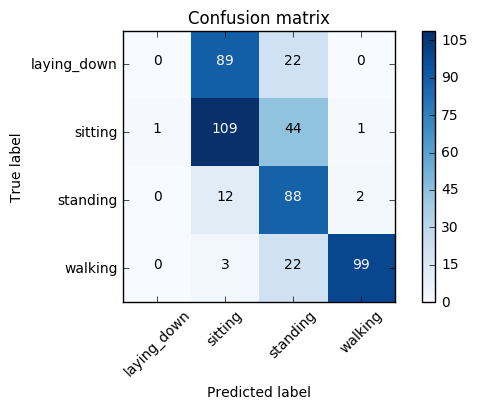

0.6016260162601627


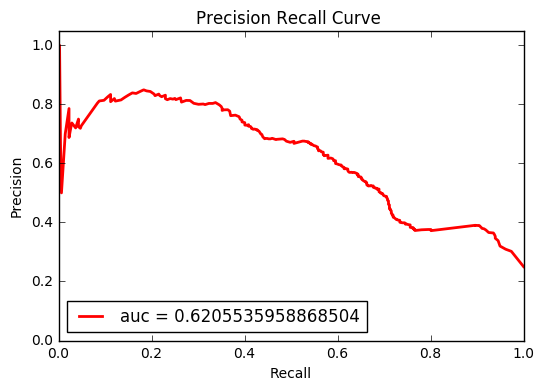

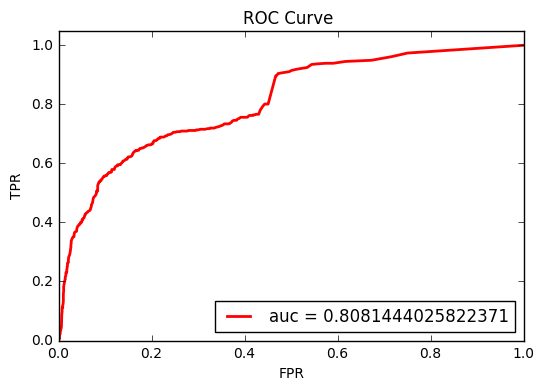

[0.         0.51173709 0.5        0.97058824]


In [15]:
preds = clf.predict(test_features)
#pred_labels = le_s.inverse_transform(preds)
#print(pred_labels[0:5])
plot_confusion_matrix(confusion_matrix(le_s.inverse_transform(test_labels),le_s.inverse_transform(preds)), classes = le_s.classes_)
print(accuracy_score(test_labels,preds))
score_knn = clf.predict_proba(test_features)
test_labels_bin = label_binarize(test_labels, classes = [0,1,2,3])
p_knn = dict()
r_knn = dict()
pr_auc_knn = dict()
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
p_knn["micro"],r_knn["micro"],_ = precision_recall_curve(test_labels_bin.ravel(),score_knn.ravel())
pr_auc_knn["micro"] = average_precision_score(test_labels_bin, score_knn,
                                                     average="micro")
fpr_knn["micro"],tpr_knn["micro"], _ = roc_curve(test_labels_bin.ravel(),score_knn.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])
plt.plot(r_knn["micro"], p_knn["micro"], color='red', lw=2,
            label='auc = {0}'.format(pr_auc_knn["micro"]))
plt.legend(loc="lower left")
plt.title('Precision Recall Curve ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
plt.plot(fpr_knn["micro"], tpr_knn["micro"], color='red',
         lw=2, label='auc = {0}'.format(roc_auc_knn["micro"]))
plt.legend(loc="lower right")
plt.title('ROC Curve ')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(precision_score(test_labels, preds, average=None))
